In [1]:
#%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import fabio, sys
import pyFAI
import glob

sys.path.insert(0, '../02-scripts/')
from calibrators import *

# Q calibration

You can calibrate the detector image by creating a so-called poni file using the GUI provided by pyFAI by calling 

```pyFAI-calib2 calibrant_img```


Otherwise, you can add the geometry  and detector parameters as in the following cell


In [2]:
from pyFAI.azimuthalIntegrator import AzimuthalIntegrator
from pyFAI.calibrant import get_calibrant
import pyFAI.detectors

x,y = np.load('../04-processed/centers.npy') # import the beam center 
wl = 1e-10 # wavelength of the X-rays in meter
cal = get_calibrant("AgBh") # calibrant type
cal.wavelength = wl
d = 50e-3 # sample-detector distance in meter

# detector
p_size = 96e-6 # pixel size in meter
n_pixel = 1024 # number of pixels in each dimension of the detector
detector = pyFAI.detectors.Detector(p_size, p_size)
detector.max_shape=(n_pixel, n_pixel)


ai = AzimuthalIntegrator(dist=d, detector=detector, wavelength=wl, poni1=x*p_size, poni2=y*p_size)

# otherwise import a poni file
# ai = pyFAI.poni(filename.poni)

### Load data

Text(0.5, 1.0, 'mask')

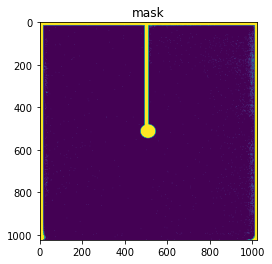

In [3]:
# load mask - pyFAI uses 1 for masking and 0 for the pixels to keep
mask = np.load('/Users/maddalena/Nextcloud/01-SU/projects/21-github/XRD/mask_pyfai.npy')
plt.figure()
plt.imshow(mask)
plt.title('mask')

In [4]:
# background 
bg_fn = '../03-data/02-blank-296.sfrm'
bg_ar = np.array(fabio.open(bg_fn).data, dtype=float)

In [5]:
path = '../03-data/'
files = sorted(glob.glob(path + '*.sfrm'))
files

['../03-data/01-Ag-behenate-296.sfrm',
 '../03-data/02-blank-296.sfrm',
 '../03-data/03-A3641-conc-296.sfrm',
 '../03-data/04-A3641-conc-273.sfrm',
 '../03-data/05-A3641-conc-268.sfrm',
 '../03-data/06-A3641-conc-266.sfrm',
 '../03-data/07-A3641-conc-263.sfrm',
 '../03-data/08-A3641-conc-260.sfrm',
 '../03-data/09-F4503-conc-296.sfrm',
 '../03-data/10-F4503-conc-273.sfrm',
 '../03-data/11-F4503-conc-268.sfrm',
 '../03-data/12-F4503-conc-266.sfrm',
 '../03-data/13-F4503-conc-263.sfrm',
 '../03-data/14-F4503-conc-260.sfrm',
 '../03-data/15-F4503-conc-257.sfrm',
 '../03-data/16-F4503-conc-296.sfrm',
 '../03-data/17-blank-quartz-296.sfrm',
 '../03-data/18-calibrator-xfel.sfrm']

## Calculate the azimutal integration and plot it

In [6]:
bins = 300
qs, Iqs = np.zeros(shape=(len(files), bins)), np.zeros(shape=(len(files), bins))

for i,file in enumerate(files):
    img = np.array(fabio.open(file).data, dtype=float)
    qs[i], Iqs[i] = ai.integrate1d(img, bins, unit='q_A^-1', mask=mask,  correctSolidAngle=False)

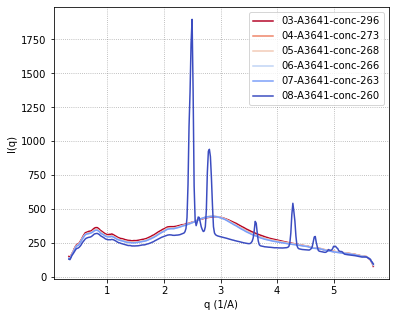

In [7]:
plt.figure(figsize=(6,5))
col = plt.cm.coolwarm_r(np.linspace(0,1,6))

c = 0
for i in range(len(files)):
    if 'A3641' in files[i]:
        plt.plot(qs[i], Iqs[i], c=col[c], label=files[i][11:-5])
        c += 1

plt.ylabel('I(q)')
plt.xlabel('q (1/A)')
plt.grid(ls=':', alpha=.7, c='gray')
plt.legend(bbox_to_anchor=[1,1])